## Wine Quality Analysis






### Problem statement
- This project understands how the quality of wine is affected by other variables such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.

    

### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn, sklearn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC 
from sklearn.linear_model import Lasso
from warnings import filterwarnings
filterwarnings(action='ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv('D:/Wine Quality Analysis/Notebook/wine_data.csv')

#### Shape of the dataset

In [3]:
data.shape

(1599, 12)

#### Show Top 5 Records

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Checks to Perform
#### Check Missing Values

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There are no missing values in the Dataset.

#### Check Data Types

In [6]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Checking the number of unique values of each column

In [7]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Check statistics of data set

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Exploring Data (Visualization)
### - Barplot
### - Heatmap (Correlation Matrix)

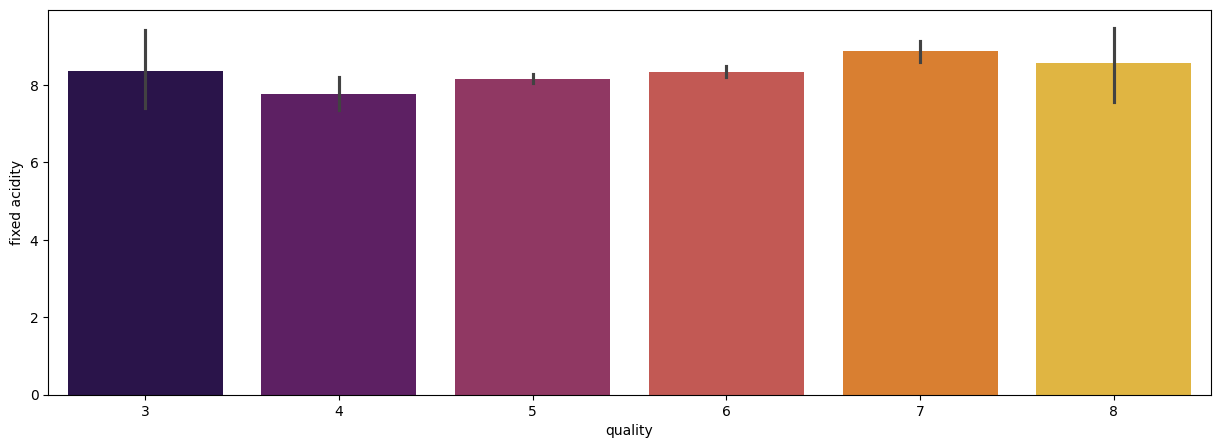

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['fixed acidity'],x=data.quality, palette='inferno')
plt.show()

### Insight
#### fixed acidity changes as the quality increases.

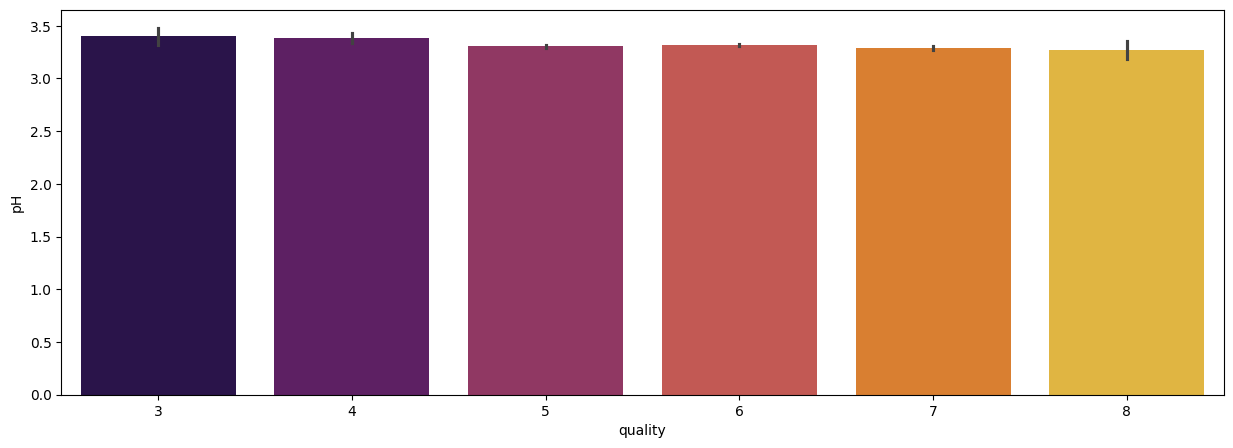

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(y=data.pH,x=data.quality,palette='inferno')
plt.show()

### Insight
#### good quality wine has less pH value.

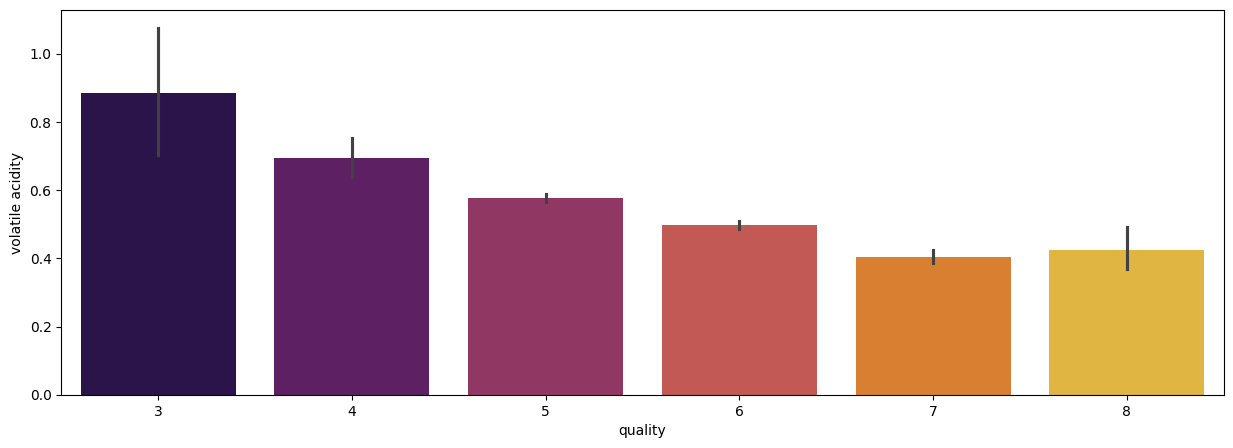

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['volatile acidity'],x=data.quality,palette='inferno')
plt.show()

#### Insights
##### good quality wine has less amount of volatile acidity.

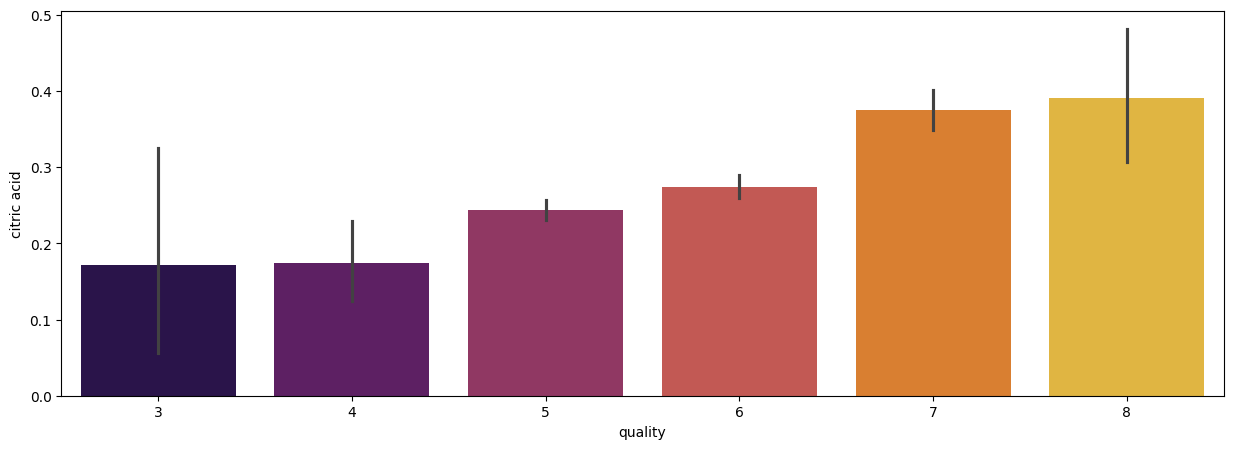

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['citric acid'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### good quality wine has more amount of citric acid.

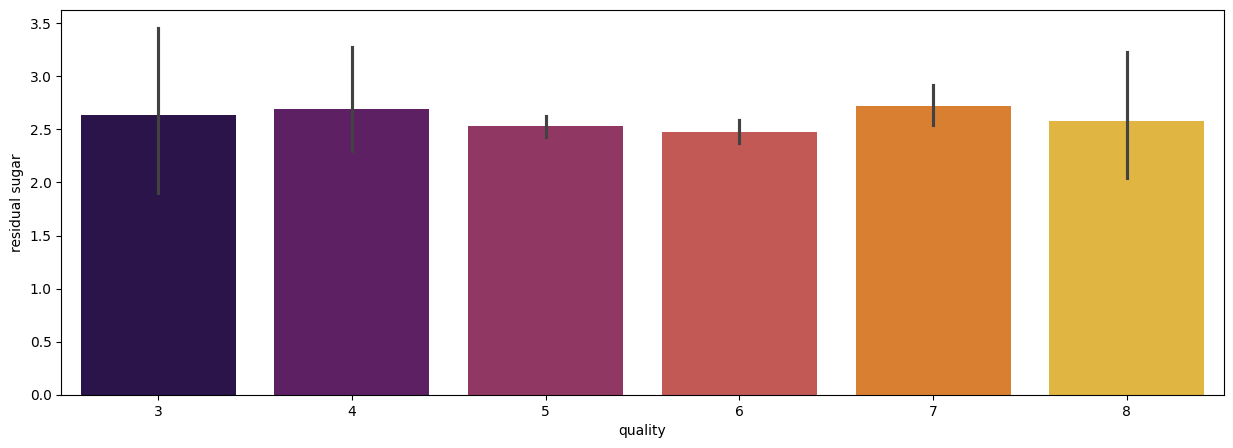

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['residual sugar'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### residual sugar changes as the quality increases.

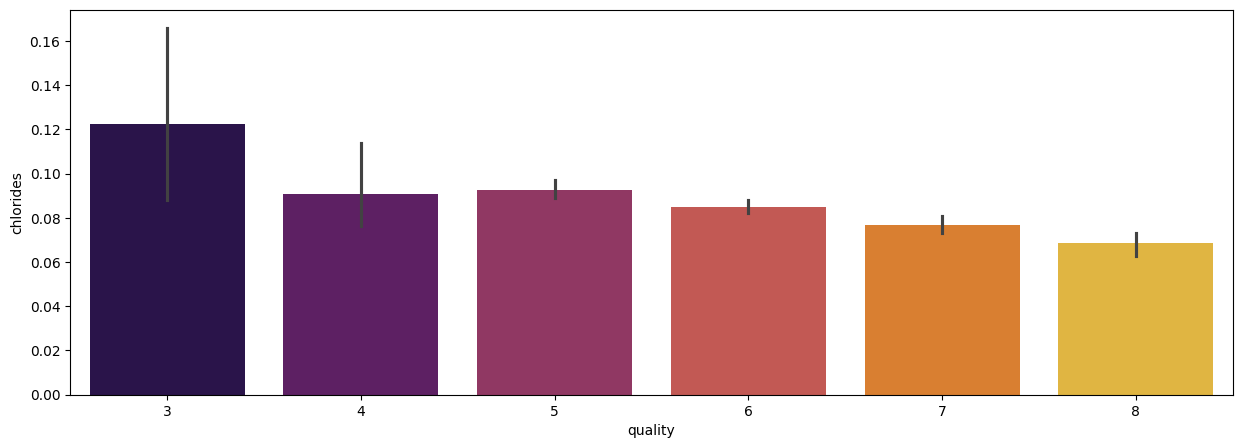

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['chlorides'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### good quality wine has less amount of chlorides.

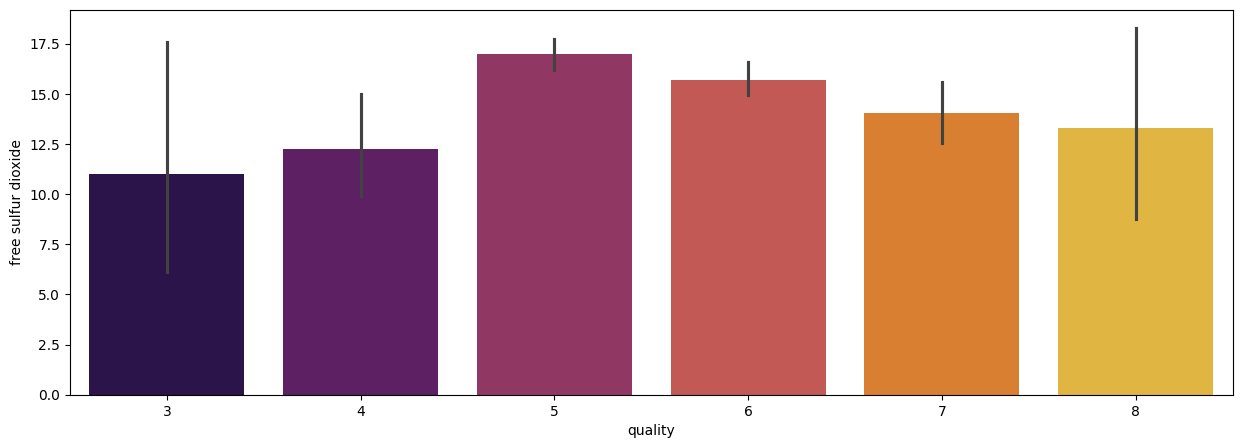

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['free sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### free sulphur dioxide first increases then decreases gradually as the wine quality increases.

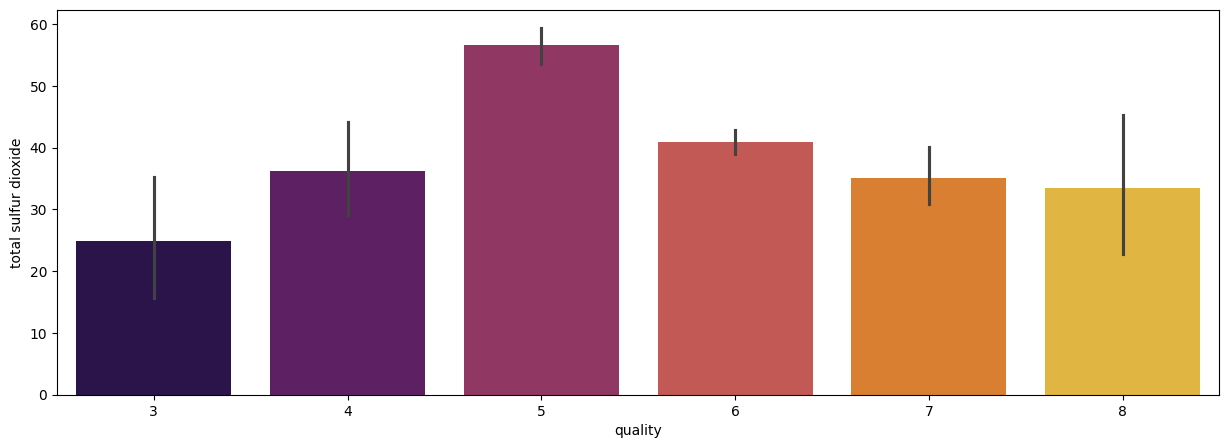

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['total sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### total sulphur dioxide first increases then decreases gradually as the wine quality increases.

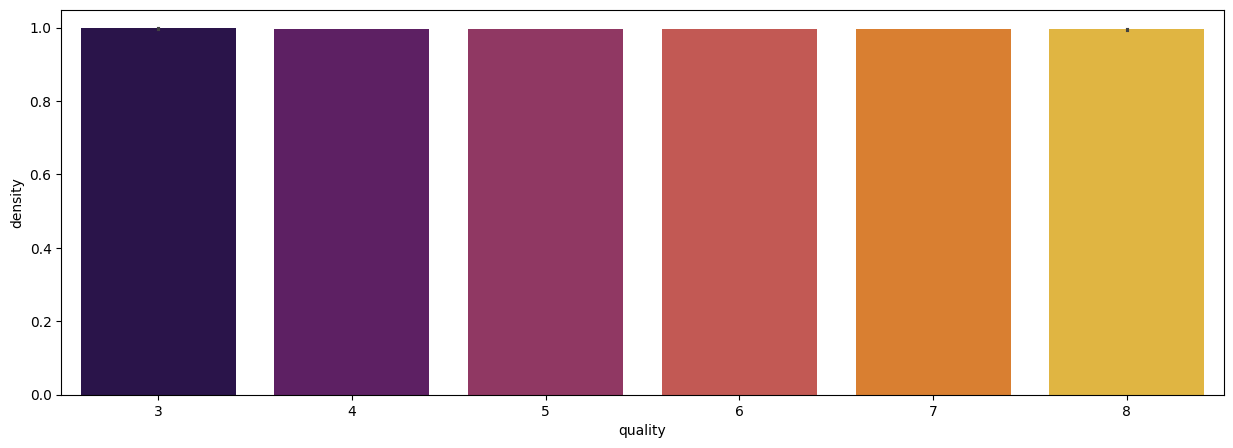

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['density'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### density has no impact on the wine quality.

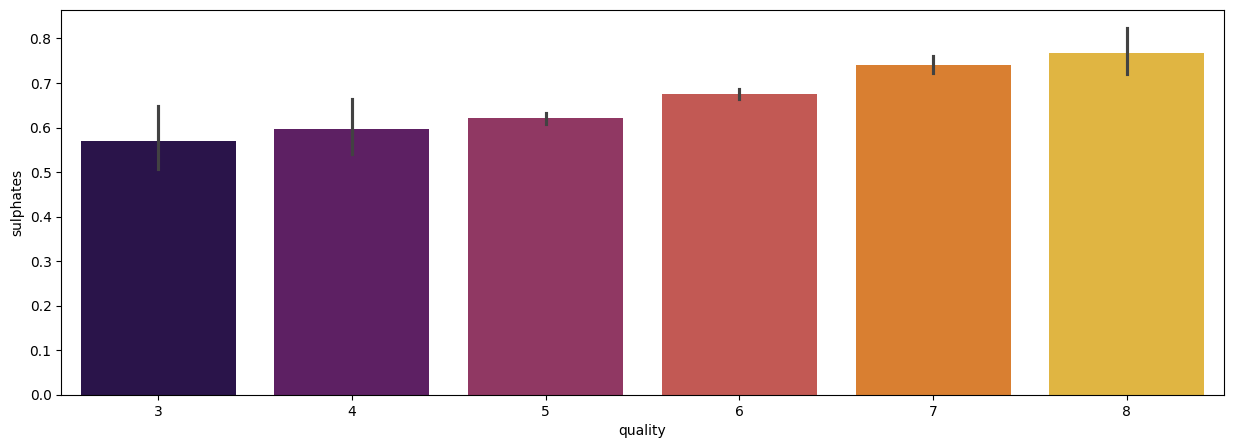

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['sulphates'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### good quality wine has more amount of sulphates.

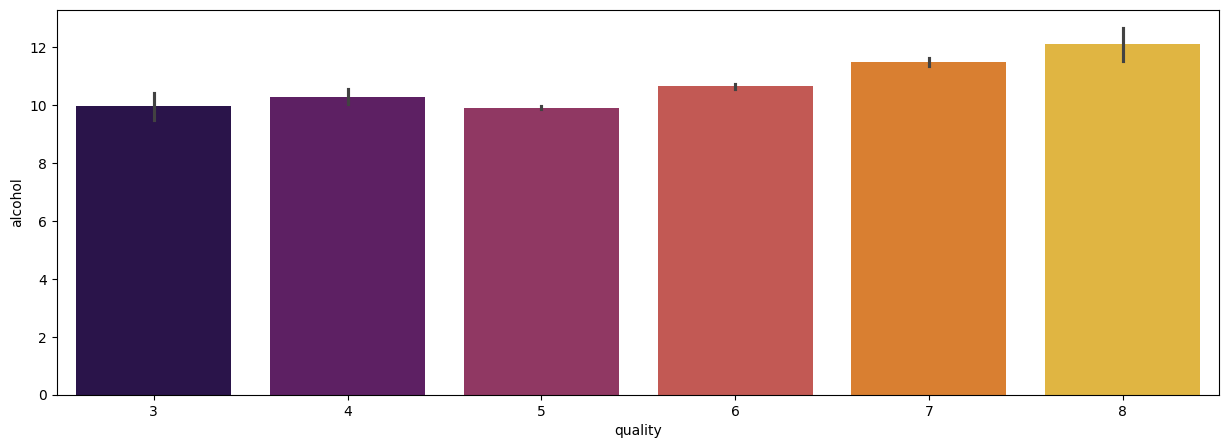

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['alcohol'],x=data.quality,palette='inferno')
plt.show()

### Insight
#### good quality wine has more amount of alcohol.

In [20]:
correlation = data.corr()

<Axes: >

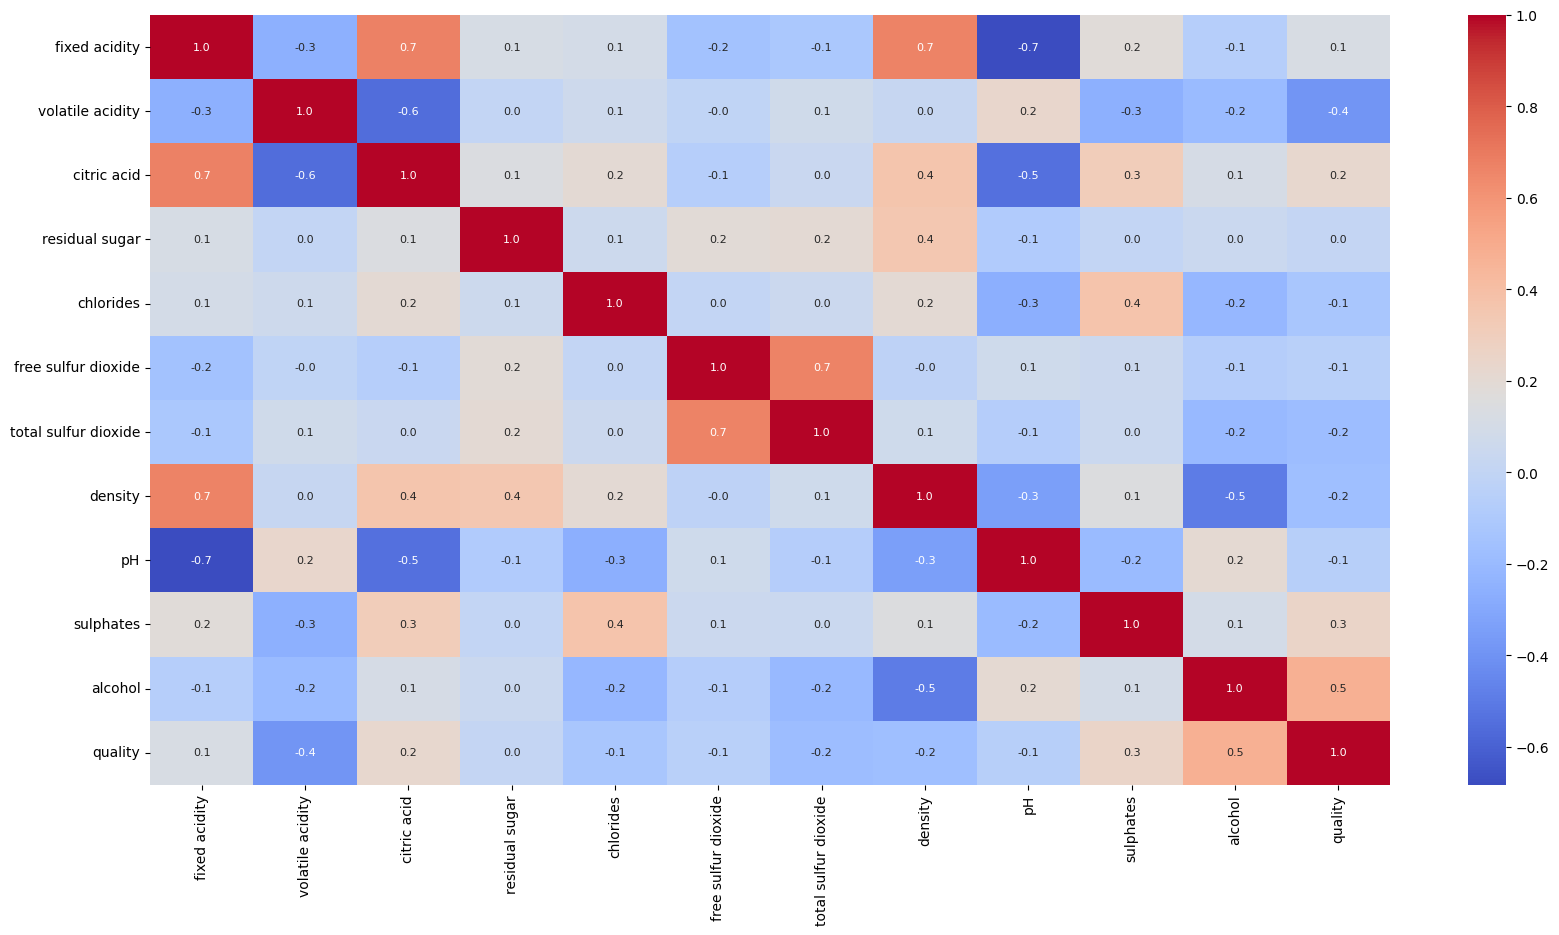

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='coolwarm')

## Feature Selection

In [22]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
819,9.1,0.66,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,5
934,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
286,12.0,0.45,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,6
525,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5
1525,6.7,0.48,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.7,5


In [23]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [24]:
data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [25]:
x = data.drop(columns='quality',axis=1)

In [26]:
y = data['quality'].apply(lambda value : 1 if value >= 7 else 0)

In [27]:
y.unique()

array([0, 1], dtype=int64)

In [28]:
std = StandardScaler()
x = std.fit_transform(x)

In [29]:
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [30]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

## Splitting Dataset

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

## Model Training

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
models = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel='poly'),RandomForestClassifier(),GradientBoostingClassifier()]

def accuracy(features,labels):
    for model in models:
        print(model)
        model.fit(features, labels)  # Assuming xtrain and ytrain are defined somewhere
        train_pred = model.predict(features)
        accuracy = accuracy_score(train_pred, labels)
        print(accuracy)
        print('---------------------------')
print('accuracy of train data\n===========================')
accuracy(features=xtrain,labels=ytrain)
print('\n\naccuracy of test data\n===========================')
accuracy(features=xtest,labels=ytest)

accuracy of train data
DecisionTreeClassifier()
1.0
---------------------------
LogisticRegression()
0.8803752931978108
---------------------------
SVC(kernel='poly')
0.9046129788897577
---------------------------
RandomForestClassifier()
1.0
---------------------------
GradientBoostingClassifier()
0.9577795152462861
---------------------------


accuracy of test data
DecisionTreeClassifier()
1.0
---------------------------
LogisticRegression()
0.890625
---------------------------
SVC(kernel='poly')
0.903125
---------------------------
RandomForestClassifier()
1.0
---------------------------
GradientBoostingClassifier()
0.996875
---------------------------


In [33]:
def crossval():
    for model in models:
        print(model)
        crossval = cross_val_score(model,xtest,ytest,cv=5)
        print('accuracy on each iteration',crossval)
        crossval = sum(crossval)/len(crossval)
        print('mean accuracy ',crossval)
crossval()

DecisionTreeClassifier()
accuracy on each iteration [0.96875  0.828125 0.8125   0.875    0.78125 ]
mean accuracy  0.853125
LogisticRegression()
accuracy on each iteration [0.875    0.828125 0.859375 0.90625  0.875   ]
mean accuracy  0.86875
SVC(kernel='poly')
accuracy on each iteration [0.84375  0.859375 0.890625 0.875    0.875   ]
mean accuracy  0.86875
RandomForestClassifier()
accuracy on each iteration [0.921875 0.921875 0.84375  0.875    0.90625 ]
mean accuracy  0.89375
GradientBoostingClassifier()
accuracy on each iteration [0.90625  0.90625  0.890625 0.90625  0.890625]
mean accuracy  0.9


In [34]:
#creating dictionary that contains hyperparameter values for above mentioned models.

model_hyperparameters = {
    'DecisionTreeClassifier_hyperparameters': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression_hyperparameters': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'fit_intercept': [True, False],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500,1000,2000]
    },
    'SVC_hyperparameters': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier_hyperparameters': {
    'n_estimators': [50, 100, 200], 
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']  
    }
    ,

    'GradientBoostingClassifier_hyperparameters': {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'subsample': [0.8, 1.0]  
    }
}

In [35]:
model_keys = list(model_hyperparameters.keys())
model_keys

['DecisionTreeClassifier_hyperparameters',
 'LogisticRegression_hyperparameters',
 'SVC_hyperparameters',
 'RandomForestClassifier_hyperparameters',
 'GradientBoostingClassifier_hyperparameters']

In [36]:
models = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel='poly'),RandomForestClassifier(),GradientBoostingClassifier()]
def modelSelection(list_of_models,model_hyperparameters_dict):

    result = []
    i = 0

    for model in list_of_models:
        key = model_keys[i]

        params = model_hyperparameters_dict[key]

        i = i + 1

        print(model)
        print(params)

        classifier = RandomizedSearchCV(model,params,cv=5)
        classifier.fit(xtrain,ytrain)

        result.append({'model used' : model,
                       'highest score' : classifier.best_score_,
                       'best hyperparameters': classifier.best_params_})
        
    result_dataframe = pd.DataFrame(result,columns=['model used','highest score','best hyperparameters'])

    return result_dataframe


dataframe = modelSelection(list_of_models=models,model_hyperparameters_dict=model_hyperparameters)

DecisionTreeClassifier()
{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
LogisticRegression()
{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'fit_intercept': [True, False], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 500, 1000, 2000]}
SVC(kernel='poly')
{'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
RandomForestClassifier()
{'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}
GradientBoostingClassifier()
{'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 1.0]}


In [37]:
pd.set_option('display.max_colwidth', None)
dataframe

,model used,highest score,best hyperparameters
0,DecisionTreeClassifier(),0.870987,"{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}"
1,LogisticRegression(),0.879593,"{'solver': 'saga', 'penalty': 'l1', 'max_iter': 2000, 'fit_intercept': True, 'C': 10}"
2,SVC(kernel='poly'),0.863958,"{'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 1}"
3,RandomForestClassifier(),0.896783,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}"
4,GradientBoostingClassifier(),0.898358,"{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}"


## Random Forest Classifier

In [38]:
model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,n_estimators=200)
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=200)

In [39]:
train_pred = model.predict(xtest)
accuracy = accuracy_score(ytest,train_pred)
accuracy

0.95

In [40]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
1438,7.0,0.590,0.00,1.7,0.052,3.0,8.0,0.99600,3.41,0.47,10.3,5
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
804,8.4,0.520,0.22,2.7,0.084,4.0,18.0,0.99682,3.26,0.57,9.9,6


In [41]:
input = (9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.52,0.58,9.2)
input = np.asarray(input).reshape(1,-1)
input = std.transform(input)
pred = model.predict(input)
pred

array([0], dtype=int64)

In [42]:
if pred[0] == 0:
    print('not a good quality wine')
else:
    print('good quality wine')

not a good quality wine
